<h1>2022.05.11. 강의 시간내 실습</h1>

In [19]:
import warnings

warnings.filterwarnings('ignore')

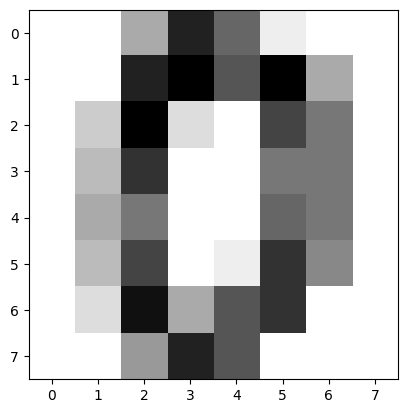

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [21]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

<h2>Deap Learning</h2>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [23]:
print(X_train.shape)

(1437, 64)


In [32]:
from keras import models
from keras import layers
from keras.optimizers import Adam

def build_model(): 
    model = models.Sequential()
    
    model.add(layers.Dense(64, activation='sigmoid', input_shape=(64,)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    
    return model

In [33]:
model = build_model() 

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 10)                170       
                                                                 
Total params: 6,938
Trainable params: 6,938
Non-trainable params: 0
_________________________________________________________________


In [34]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [35]:
model_history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.2)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test_one_hot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
18/18 [==============================] - 1s 25ms/step - loss: 2.2941 - accuracy: 0.1445 - val_loss: 2.1728 - val_accuracy: 0.2500
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 2.0467 - accuracy: 0.3124 - val_loss: 1.9695 - val_accuracy: 0.3750
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 1.7918 - accuracy: 0.4291 - val_loss: 1.6874 - val_accuracy: 0.4965
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 1.4722 - accuracy: 0.5831 - val_loss: 1.3640 - val_accuracy: 0.6424
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 1.1573 - accuracy: 0.7111 - val_loss: 1.0629 - val_accuracy: 0.7674
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 0.8834 - accuracy: 0.8146 - val_loss: 0.8117 - val_accuracy: 0.8507
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6578 - accuracy: 0.8703 - val_loss: 0.6350 - val_accuracy: 0.8889
Epoch 8/100


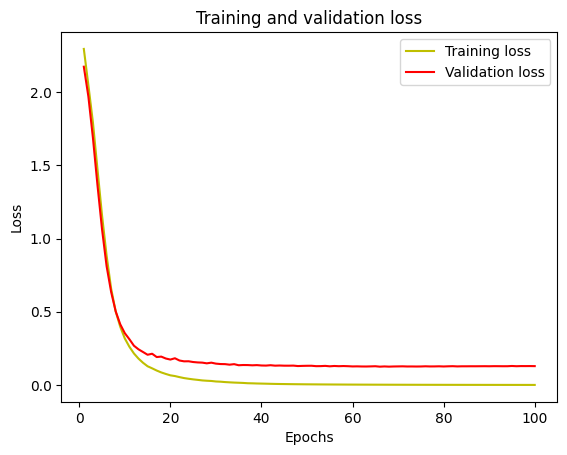

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

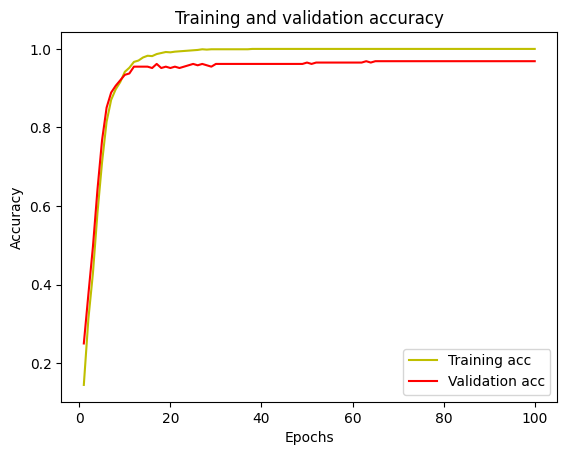

In [37]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()